# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">چرخاندن (Rotations)</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">چرخش با محاسبه دستی ماتریس دوران</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">در ابتدا با محاسبه ی ماتریس دوران تصویر را میچرخانیم!</div>

$$ M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

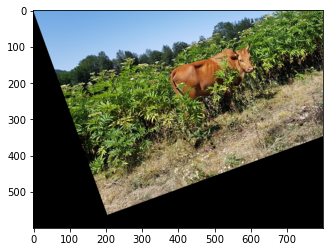

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rotation_amount_degree = -20
#  convert rotation amount to radian
theta = rotation_amount_degree * np.pi / 180.0


image = cv2.imread('images/input.jpg')
height, width, _ = image.shape

#       | cos(theta) -sin(theta) Tx |
#  T  = | sin(theta) cos(theta)  Ty |

# T is our rotation matrix
T = np.float32([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta),0]])
# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
plt.imshow(img_translation[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">چرخش به همراه جا به جایی</div>

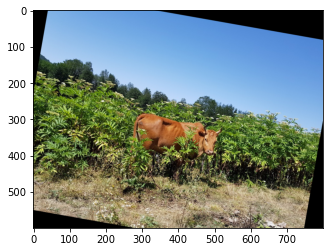

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rotation_amount_degree = 10
#  convert rotation amount to radian
theta = rotation_amount_degree * np.pi / 180.0


image = cv2.imread('images/input.jpg')
height, width, _ = image.shape

#       | cos(theta) -sin(theta) Tx |
#  T  = | sin(theta) cos(theta)  Ty |

# T is our rotation matrix
T = np.float32([[np.cos(theta), -np.sin(theta), 50], [np.sin(theta), np.cos(theta),-50]])
# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
plt.imshow(img_translation[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از getRotationMatrix</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">به جای محاسبات مثلثاتی میتوانیم از تابع getRotationMatrix2D استفاده کنیم که امکان چرخواندن عکس به مرکزیت دلخواه را میدهد.</div>


Rotation of an image for an angle θ is achieved by the transformation matrix of the form

$$ M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by

$$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$$

where

$$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$$

To find this transformation matrix, OpenCV provides a function, [cv.getRotationMatrix2D](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326). Check out the below example which rotates the image by 90 degree with respect to center without any scaling. 

`getRotationMatrix2D(center, angle, scale)`

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/input.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 20, .5)
print(rotation_matrix)

[[ 4.69846310e-01  1.71010072e-01  1.60758454e+02]
 [-1.71010072e-01  4.69846310e-01  2.27450136e+02]]


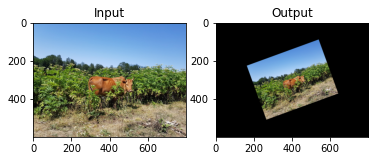

In [4]:
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Input');
plt.subplot(122),plt.imshow(rotated_image[...,::-1]),plt.title('Output');

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترانهاده ماتریس</div>


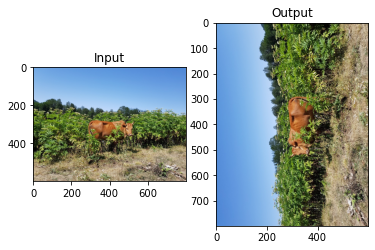

In [5]:
#Other Option to Rotate
img = cv2.imread('images/input.jpg')

transposed = cv2.transpose(img)

plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(transposed[...,::-1]),plt.title('Output')
plt.show()


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">flip  تصویر به صورت افقی</div>


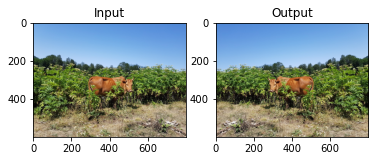

In [6]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)

plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(flipped[...,::-1]),plt.title('Output')
plt.show()


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">flip  تصویر به صورت عمودی</div>


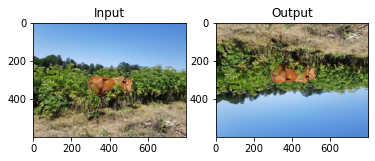

In [ ]:
# Let's now to a Vertical flip.
flipped = cv2.flip(image, 0)

plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(flipped[...,::-1]),plt.title('Output')
plt.show()


https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html